In [1]:
import torch
import pickle
import os
sys.path.append('/home/ql2221/Projects/thermalizer/thermalizer/kolmogorov')
import performance
sys.path.append('/home/ql2221/Projects/thermalizer/thermalizer/models')
import misc

In [7]:
#get the emulator
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

with open('/scratch/ql2221/thermalizer_data/wandb_data/wandb/latest-run/files/checkpoint_last.p', 'rb') as f:
    checkpoint = pickle.load(f)

print(checkpoint.keys())  # Print the content to check what it contains (model, optimizer, etc.)

model_weights = checkpoint['state_dict']
optimizer_state_dict = checkpoint['optimizer_state_dict']

# Extract the configuration (this might include hyperparameters, model architecture details, etc.)
config = checkpoint['config']

# Initialize your model with the correct config
# Assuming you have a model class like 'ModernUnet' from the 'unet_modern' module
model=misc.model_factory(config).to(device)


dict_keys(['epoch', 'training_step', 'state_dict', 'optimizer_state_dict', 'val_loss', 'config'])


In [8]:
#load data
loaded_data = torch.load("/scratch/ql2221/thermalizer_data/kolmogorov/reynold10k/0412test.p")
sim_stack_loaded = loaded_data["data"]

In [9]:
x = sim_stack_loaded[0,0,:,:]
x = x.unsqueeze(0).unsqueeze(0).to(device)

In [10]:
rollout, _,_ = performance.run_emu(x,model,None,1000)

100%|██████████| 999/999 [00:05<00:00, 172.42it/s]


/ext3/miniforge3/lib/python3.12/site-packages/matplotlib/colors.py:778: RuntimeWarning: overflow encountered in multiply
  xa *= self.N


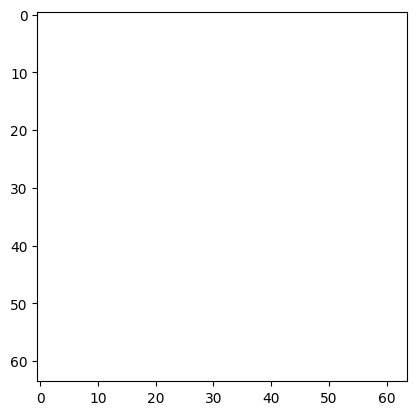

In [11]:
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import numpy as np

# Assume you have state_vector from run_emu
# Choose the first example in the batch
frames = rollout[0].detach().cpu().numpy()

fig, ax = plt.subplots()
im = ax.imshow(frames[0], cmap='viridis', animated=True)

def update(frame):
    im.set_array(frame)
    return [im]

ani = animation.FuncAnimation(fig, update, frames=frames, interval=50, blit=True)

# Save as MP4 (requires ffmpeg installed)
ani.save("state_vector_movie.mp4", writer='ffmpeg')

# Or save as GIF (requires imagemagick installed)
# ani.save("state_vector_movie.gif", writer='imagemagick')

plt.show()
